In [1]:
!pip install openpyxl 
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
import time

start_time = time.time()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.2f} seconds")

Execution time: 0.00 seconds


# 1. EDA

In [3]:
 #read excel file using file path
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0) #or alternatively from pc download folder, romove # to run
# df = pd.read_excel(r"C:\Users\user\Downloads\online\online_retail_II.xlsx", sheet_name=0)

In [4]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## Checking data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## From the above info we see that Customer ID has some missing values while InvoiceDate column has incorrect date format.

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


# We see that min value for quantity and price are negative, so we suspect something in the data. 

In [7]:
#See the object /categorical value of the dataframe
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


### Handling Miising Values

In [8]:
#Seeing  the non avaliable data point in "Customer ID" column
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


### Checking Data anomalies in quantity column

In [9]:
# Since quantity shouldn't be negative , let's explore the column's value
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


### Checking Data validity, type, format etc

In [10]:
#we know that the invoice number is only six digit if 'C" comes befor it mean 
#--cancilation, so we need to match after making it string only to become six digit
df["Invoice"]=df["Invoice"].astype("str")

In [11]:
df[df["Invoice"].str.match ("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [12]:
df[df["Invoice"].str.match ("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [13]:
#Check wether 'C" is the only character appears in invoice number or not
df["Invoice"].str.replace("[0-9]", "",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


## check whether "StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. " is true

In [15]:
df["StockCode"]=df["StockCode"].astype("str")
df[df["StockCode"].str.match ("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [16]:
#To know the discription of charatcter on stockcode and the unique patterns that don't follow our stockcode expected naming
df[(df["StockCode"].str.match ("^\\d{5}$") == False) & (df["StockCode"].str.match ("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [17]:
#Looking at other unique characters in stockcode clolumn
df[(df["StockCode"].str.match ("^\\d{5}$") == False) & (df["StockCode"].str.match ("^\\d{5}[a-zA-Z]+$") == False)] ["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
# what are the description of  "DOT" and "PADS" string in column "stockcode"
df[df["StockCode"].str.contains("DOT")]
df[df["StockCode"].str.contains("PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


###  Data Cleaning

##### Masking is very important and it's a way to find specific data that fulfills a criteria that is a Boolean statement; remember, a Boolean statement is something that can only evaluate to True or False , to find all the data in your data frame that is true with respect to the Boolean statement.We apply to filter the correct Invoice and stockcode that meets the data definition in data desciption.

In [19]:
Cleaned_df=df.copy()

In [20]:
Cleaned_df["Invoice"]=Cleaned_df["Invoice"].astype("str")

In [21]:
mask = (Cleaned_df["Invoice"]. str.match("^\\d{6}$")== True)

In [22]:
Cleaned_df=Cleaned_df[mask]

In [23]:
Cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [24]:
Cleaned_df["StockCode"]=Cleaned_df["StockCode"].astype("str")

In [25]:
mask = ((Cleaned_df["StockCode"]. str.match("^\\d{5}$")== True)
|(Cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
|(Cleaned_df["StockCode"].str.match ("^PADS$")== True)
)


In [26]:
Cleaned_df=Cleaned_df[mask]

In [27]:
Cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [28]:
#we drop the Customer ID's column null values
Cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16260\236893353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [29]:
Cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [30]:
Cleaned_df[Cleaned_df["Price"]==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [31]:
len(Cleaned_df[Cleaned_df["Price"]==0])

28

In [32]:
Cleaned_df=Cleaned_df[Cleaned_df["Price"]>0.0]

In [33]:
Cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [34]:
Cleaned_df["Price"].min()

0.001

## How much data we are losing during cleaning

In [35]:
print(f" {len(Cleaned_df)/len(df)*100:.2f}") # lost 23.3% our data during cleaning

 77.32


# 2. KMeans Clustering

##  Feature Engineering

In [36]:
#Find the sales(revenue) which is the product of quantity sold * price
Cleaned_df["SaleslineTotal"]= Cleaned_df["Quantity"]*Cleaned_df["Price"]
Cleaned_df

C:\Users\user\AppData\Local\Temp\ipykernel_16260\1770149638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_df["SaleslineTotal"]= Cleaned_df["Quantity"]*Cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SaleslineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [37]:
# Groups the DataFrame Cleaned_df by the column "Customer ID." This means that all rows with the same "Customer ID" will be grouped together.
# "Customer ID" column is not used as the index of the resulting DataFrame. Instead, it remains as a regular column.
#Calculates the sum of the "SaleslineTotal" column for each group. and Assigns the result to a new column named "MonetaryValue."
#Counts the number of unique values in the "Invoice" column for each group.And #Assigns the result to a new column named "Frequency."
#Finds the maximum value (latest date) in the "InvoiceDate" column for each group. and Assigns the result to a new column named "LastInvoivceDate.
agg_df=Cleaned_df.groupby(by="Customer ID", as_index=False) \
.agg(MonetaryValue= ("SaleslineTotal", "sum"),
    Frequency=("Invoice", "nunique"),
    LastInvoivceDate=("InvoiceDate", "max"))

In [38]:
agg_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoivceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [39]:
#finding max invoice date from new data fram
max_invoice_date=agg_df["LastInvoivceDate"]. max()

In [40]:
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [41]:
# define recency the difference between max invoice date and lastinvice date of previous data frame in numbers of days
agg_df["Recency"]=(max_invoice_date-agg_df["LastInvoivceDate"]).dt.days

In [42]:
agg_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoivceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


### Seeing Distribution of MonetaryValue, Frequency and Recency

<function matplotlib.pyplot.show(close=None, block=None)>

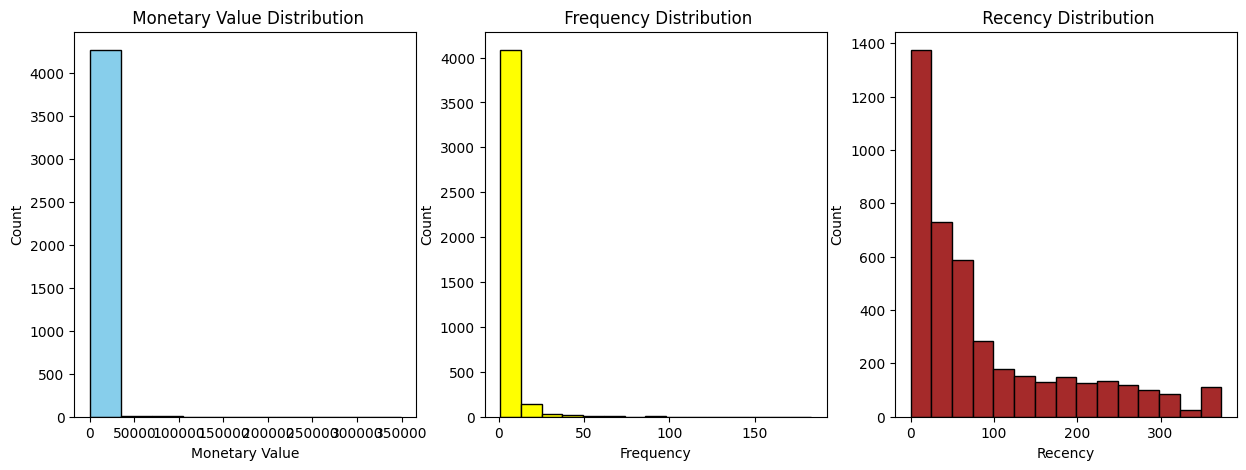

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(agg_df["MonetaryValue"], bins=10, color='skyblue', edgecolor='black')
plt.title(' Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(agg_df["Frequency"], bins=15, color='yellow', edgecolor='black')
plt.title(' Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_df["Recency"], bins=15, color='brown', edgecolor='black')
plt.title(' Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout
plt.show

### Outlier problem observed  on Monetray value and Frequency
#### Show them using box plot

<function matplotlib.pyplot.show(close=None, block=None)>

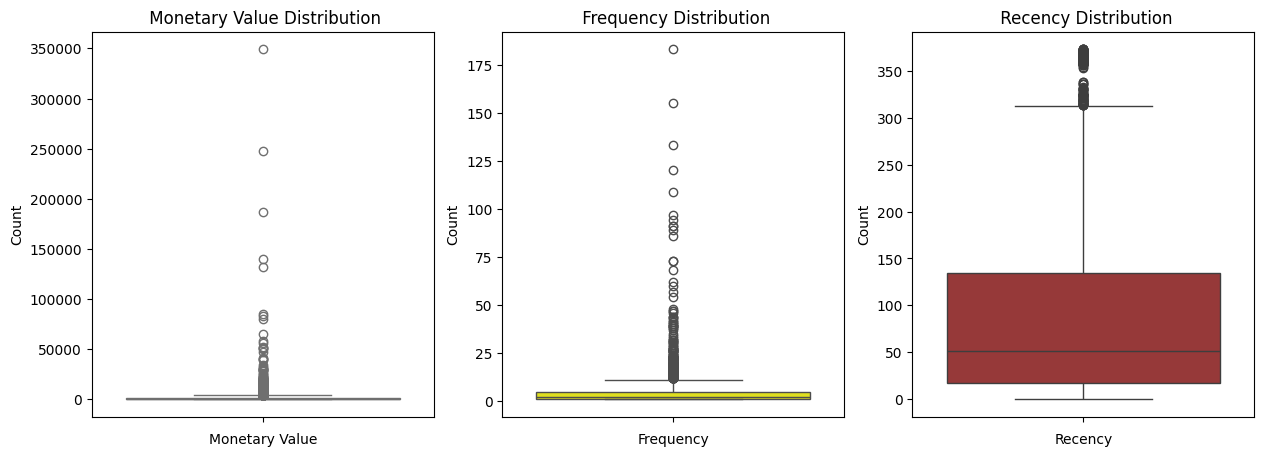

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(agg_df["MonetaryValue"], color='skyblue')
plt.title(' Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(agg_df["Frequency"], color='yellow')
plt.title(' Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(agg_df["Recency"], color='brown')
plt.title(' Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout
plt.show

### Getting ride of outliers using the interquantile range 

In [45]:
M_Q1=agg_df["MonetaryValue"].quantile(.25) # M_Q1 is first quantile of monetary value
M_Q3=agg_df["MonetaryValue"].quantile(.75) # M_Q3 is third quantile of monetary value
IQR=M_Q3-M_Q1                              # Inter quantile range of monetray value
IQR


1396.73

In [46]:
# Create new DF with monetary outlier but copy orginal df
m_o_df=agg_df[(agg_df["MonetaryValue"]>(M_Q3+1.5*IQR))| (agg_df["MonetaryValue"] <(M_Q1-1.5*IQR))].copy()
m_o_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoivceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [47]:
F_Q1=agg_df["Frequency"].quantile(.25)
F_Q3=agg_df["Frequency"].quantile(.75)
IQRF=F_Q3-F_Q1
IQRF


4.0

In [48]:
f_o_df=agg_df[(agg_df["Frequency"] > (F_Q3 + 1.5 * IQRF)) | (agg_df["Frequency"] < (F_Q1 - 1.5 * IQRF))]
f_o_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoivceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [49]:
## now create  new DF without outlier
n_o_df=agg_df[(~agg_df.index.isin(m_o_df.index)) & (~agg_df.index.isin(f_o_df.index))]
n_o_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoivceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


### Ploting after handling outliers

<function matplotlib.pyplot.show(close=None, block=None)>

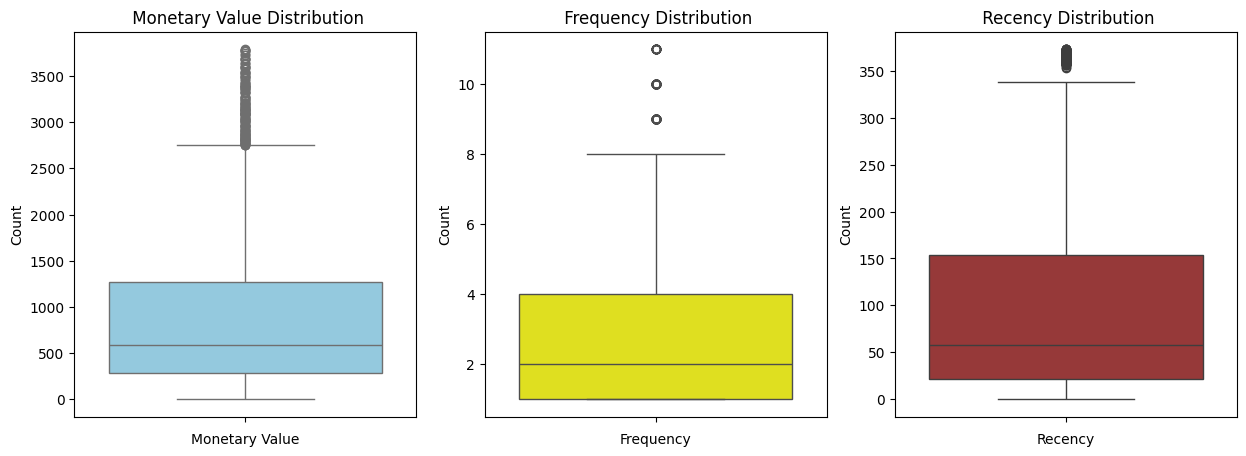

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(n_o_df["MonetaryValue"], color='skyblue')
plt.title(' Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(n_o_df["Frequency"], color='yellow')
plt.title(' Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(n_o_df["Recency"], color='brown')
plt.title(' Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout
plt.show

### 3D distribution after getting ride off outliers

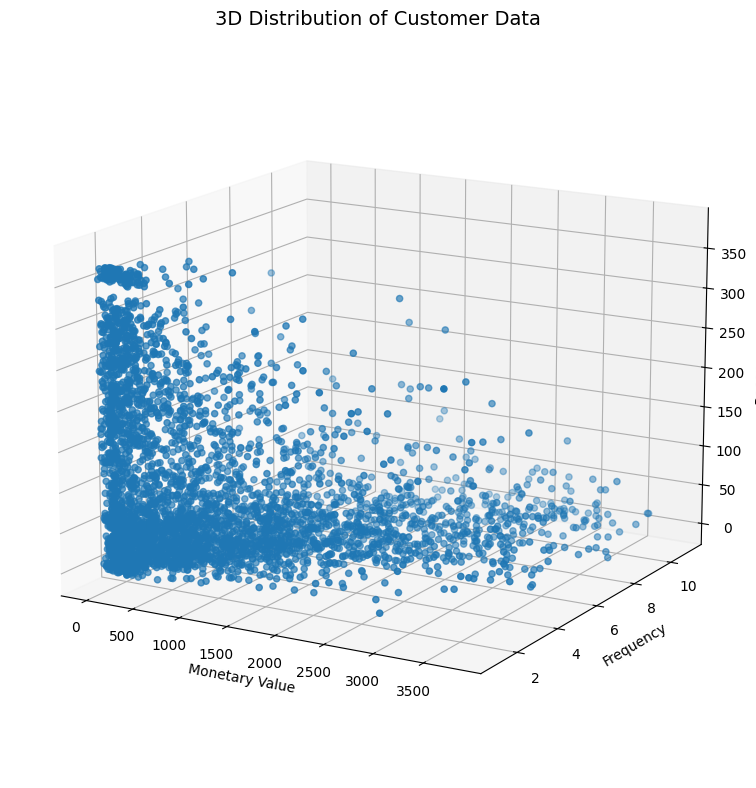

In [51]:
fig = plt.figure(figsize=(8, 8))  # Adjust figure size as needed

# Create a 3D subplot
ax = fig.add_subplot(projection="3d")  # 1 row, 1 column, 3D projection

# Create the 3D scatter plot (adjust colors as desired)
ax.scatter(n_o_df["MonetaryValue"], n_o_df["Frequency"], n_o_df["Recency"])  # Adjust marker and alpha

# Labels and title
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.suptitle('3D Distribution of Customer Data', fontsize=14)

# Adjust viewing angle (optional)
ax.view_init(elev=15, azim=-60)  # Example elevation and azimuth

plt.tight_layout()
plt.show()

### K-means is sensitive to large data and concentrates on monetary value, but we want to cluster three attributes into distinct forms. Thus we scale the data as follows.

In [52]:
scaler = StandardScaler()

In [53]:
scaler_data=scaler.fit_transform(n_o_df[["MonetaryValue","Frequency","Recency"]])
scaler_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

### change the data from np array to pandas dataframe.

In [54]:
scaler_df=pd.DataFrame(scaler_data, index=n_o_df.index, columns=("MonetaryValue","Frequency","Recency"))
scaler_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


### 3D distribution after scaling the data

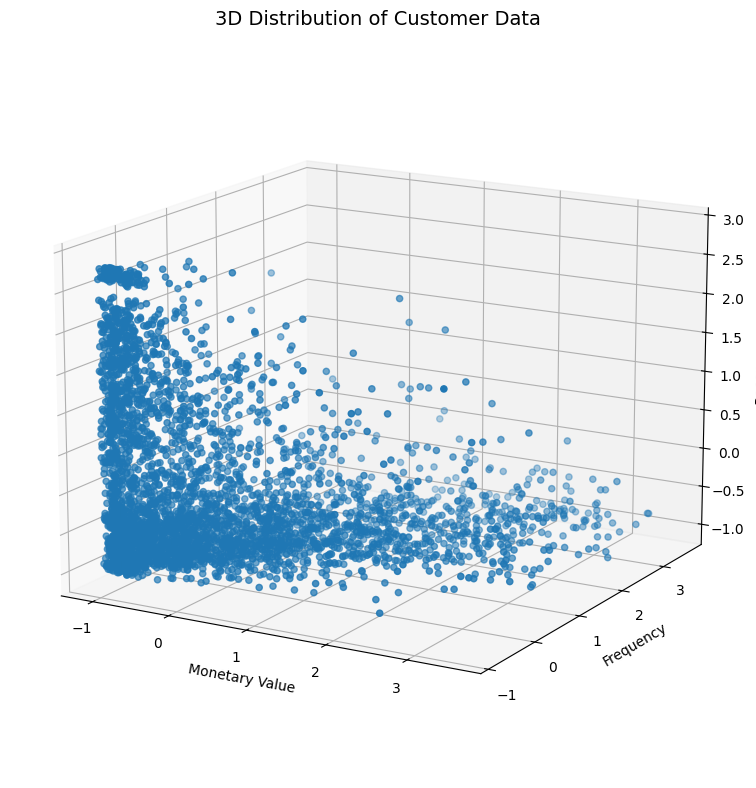

In [55]:
fig = plt.figure(figsize=(8, 8))  # Adjust figure size as needed

# Create a 3D subplot
ax = fig.add_subplot(projection="3d")  # 1 row, 1 column, 3D projection

# Create the 3D scatter plot (adjust colors as desired)
ax.scatter(scaler_df["MonetaryValue"], scaler_df["Frequency"], scaler_df["Recency"])  # Adjust marker and alpha

# Labels and title
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.suptitle('3D Distribution of Customer Data', fontsize=14)

# Adjust viewing angle (optional)
ax.view_init(elev=15, azim=-60)  # Example elevation and azimuth

plt.tight_layout()
plt.show()

##### Kmeans require the predefined number of cluster setting now it to 12 as max and calculating inertia for different valus of k
##### the numbers of k ranges from 2 to k+1 to max iteration of 1000
##### using the for lop KMeans is fitted to the scaled DF

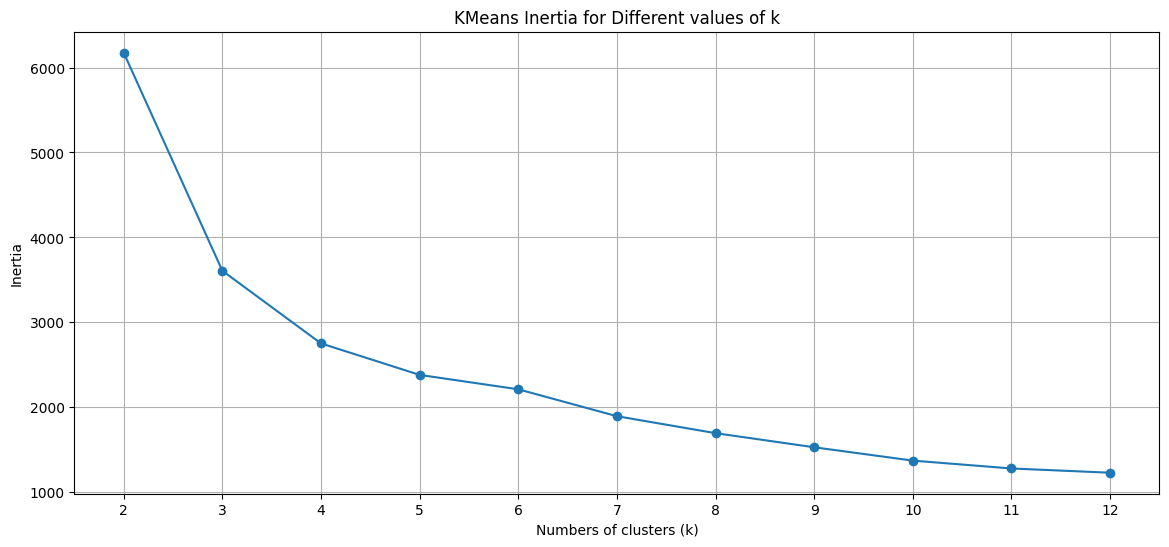

In [56]:
max_k=12
inertia=[]
k_values=range(2, max_k+1)
for k in k_values:
    kmeans=KMeans(n_clusters=k, random_state=42,max_iter=1000)
    kmeans.fit_predict(scaler_df)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different values of k')
plt.xlabel('Numbers of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

###  Introducing Silhouette Scores and  Comparing inertia  for varying values of k ;
### Silhouette Scores for varying values of k 

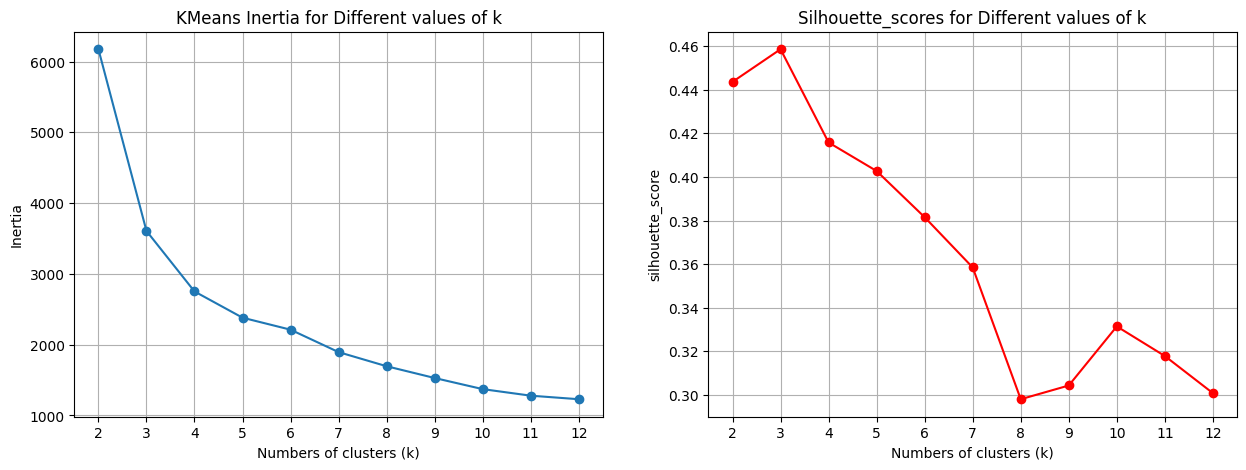

In [57]:
max_k=12
inertia=[]
silhouette_scores=[]
k_values=range(2, max_k+1)
for k in k_values:
    kmeans=KMeans(n_clusters=k, random_state=42,max_iter=1000)
    cluster_labels=kmeans.fit_predict(scaler_df)
    sil_score=silhouette_score(scaler_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different values of k')
plt.xlabel('Numbers of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.title('Silhouette_scores for Different values of k')
plt.xlabel('Numbers of clusters (k)')
plt.ylabel('silhouette_score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Run the KMeans Clustering model

In [83]:
kmeans=KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels=kmeans.fit_predict(scaler_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [84]:
silhouette_avg = silhouette_score(scaler_df, kmeans.labels_)
print("For n_clusters =", 4, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.4158069587875063


In [86]:
# Calculate silhouette score for each attribute
n_clusters=4
silhouette_scores = {}

for col in scaler_df.columns:
    # Create a temporary DataFrame with only the current attribute and the cluster labels
    temp_df = pd.DataFrame({
        'attribute': scaler_df[col],
        'cluster': cluster_labels
    })

    # Calculate silhouette score
    silhouette_avg = silhouette_score(temp_df[['attribute']], temp_df['cluster'])
    silhouette_scores[col] = silhouette_avg
for attribute, score in silhouette_scores.items():
    print(f"{attribute}: {score:.4f}")

MonetaryValue: 0.0791
Frequency: 0.0812
Recency: 0.0845


# Adding our clusters to data frame
###### on non outlier data frame

In [59]:
n_o_df["Clusters"]= cluster_labels
n_o_df

C:\Users\user\AppData\Local\Temp\ipykernel_16260\143396633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_o_df["Clusters"]= cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoivceDate,Recency,Clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


# Visualizing The clusters with differnt colors

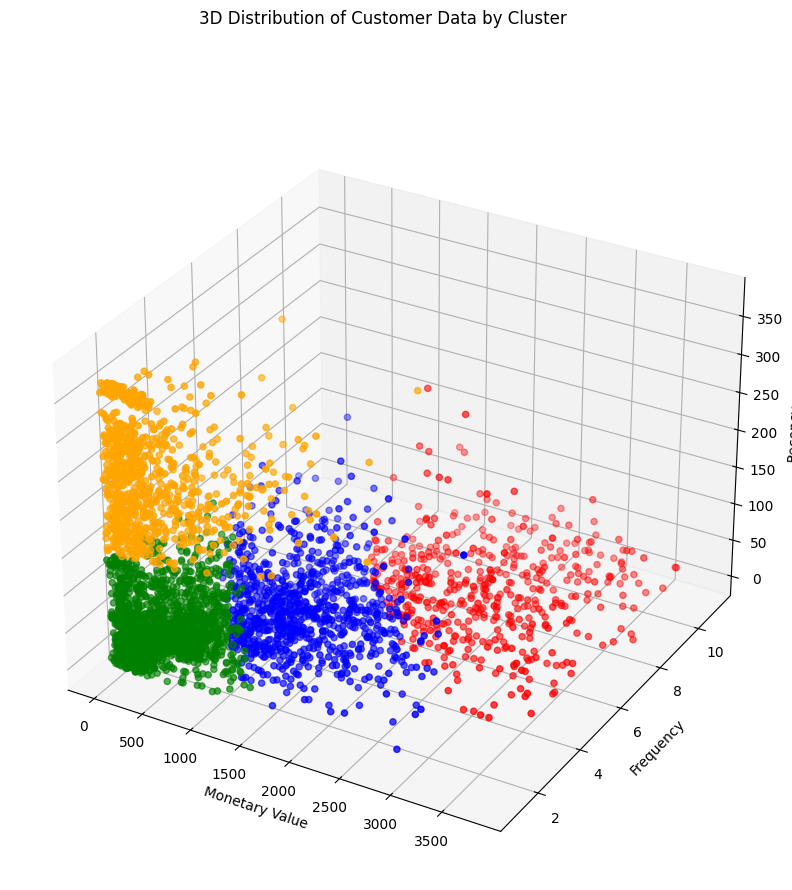

In [60]:
cluster_colors={0:'blue', 1:'orange', 2:'green', 3:'red'}
colors=n_o_df['Clusters'].map(cluster_colors)
fig = plt.figure(figsize=(10, 10))  # Adjust figure size as needed

# Create a 3D subplot
ax = fig.add_subplot(projection="3d")  # 1 row, 1 column, 3D projection
# Create the 3D scatter plot (adjust colors as desired)
ax.scatter(n_o_df["MonetaryValue"], n_o_df["Frequency"], n_o_df["Recency"],
           c=colors, #Use mapped solid colors
            marker='o')  # Adjust marker and alpha

# Labels and title
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.suptitle('3D Distribution of Customer Data by Cluster')
plt.show()


# Violin plot to ckech the clusters compactness 

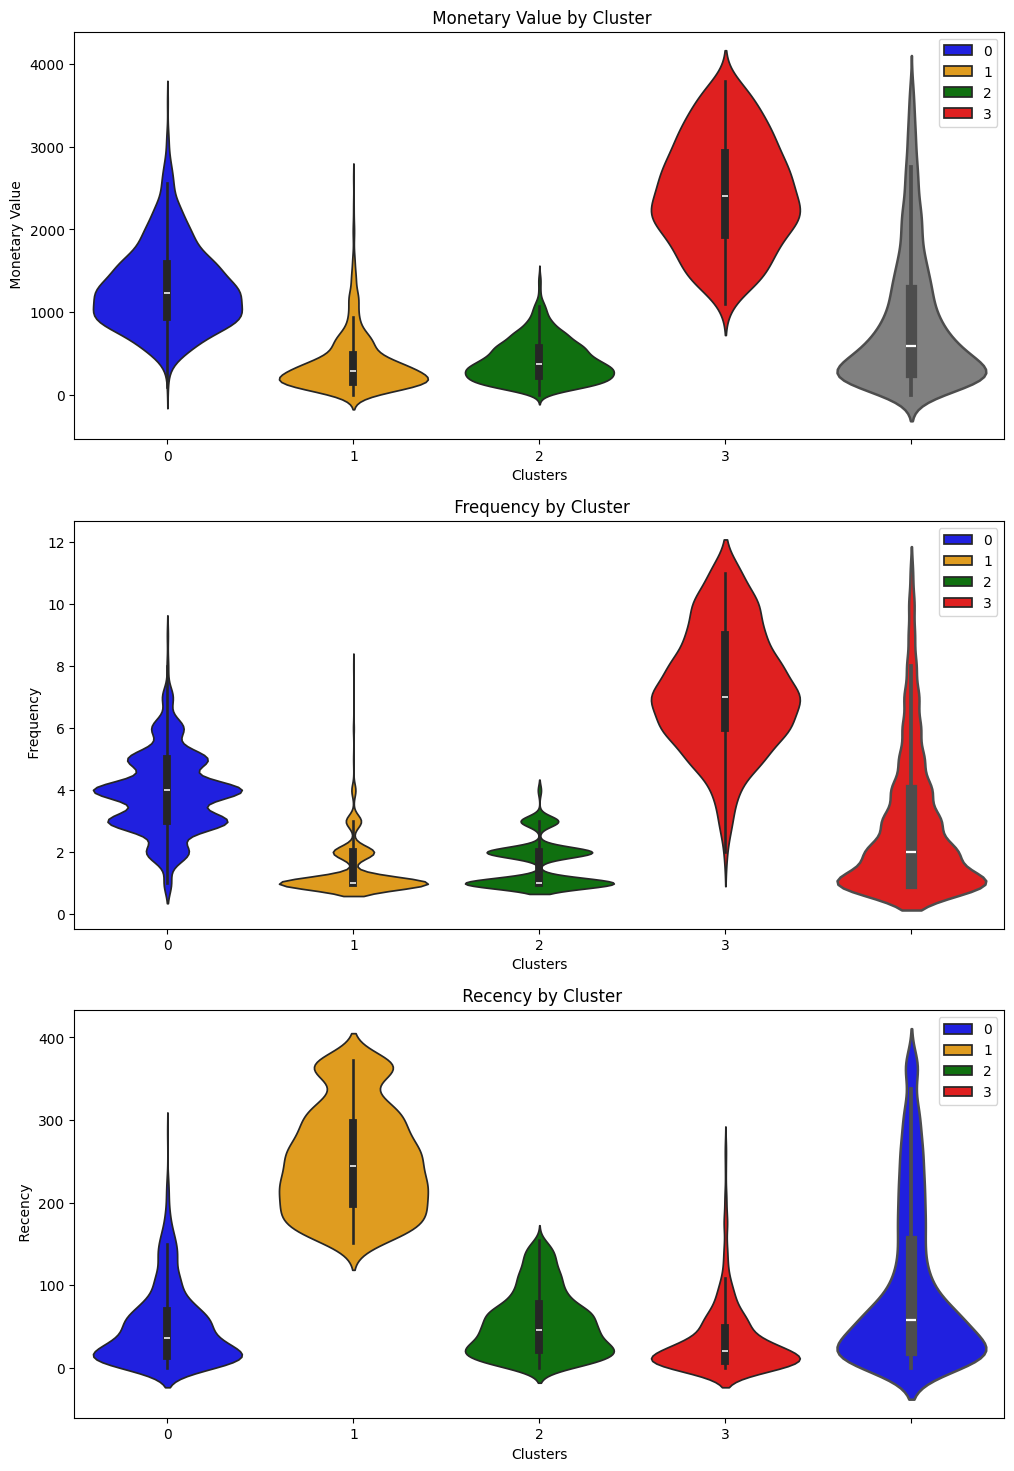

In [61]:
plt.figure(figsize=(12, 18))

plt.subplot(3,1,1)
sns.violinplot(x=n_o_df['Clusters'], y=n_o_df['MonetaryValue'], palette=cluster_colors, hue=n_o_df["Clusters"])
sns.violinplot(y=n_o_df['MonetaryValue'], color='gray', linewidth=1.8)
plt.title (' Monetary Value by Cluster')
plt.ylabel(' Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=n_o_df['Clusters'], y=n_o_df['Frequency'], palette=cluster_colors, hue=n_o_df["Clusters"])
sns.violinplot(y=n_o_df['Frequency'], color='red', linewidth=1.8)
plt.title (' Frequency by Cluster')
plt.ylabel(' Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=n_o_df['Clusters'], y=n_o_df['Recency'], palette=cluster_colors, hue=n_o_df["Clusters"])
sns.violinplot(y=n_o_df['Recency'], color='blue', linewidth=1.8)
plt.title (' Recency by Cluster')
plt.ylabel(' Recency')
plt.tight_layout
plt.show()

# Assigning real name for clusters for better intepretation and analysis